# Testing the BoARIO package
This script runs the example used on the BoARIO documentation. It then attempts to customize the classes and event/shock. 

In [1]:
# import pymrio for the test MRIOT
import pymrio

# import the different classes
from boario.extended_models import ARIOPsiModel  # The core of the model

In [2]:
mriot = pymrio.load_test().calc_all()

/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_pba.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:1001: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_imp_reg = self.D_imp.g

In [3]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
model = ARIOPsiModel(mriot)

/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/boario/model_base.py:277: UserWarning: No capital to VA dictionary given, considering 4/1 ratio
  warnings.warn("No capital to VA dictionary given, considering 4/1 ratio")


In [5]:
from boario.simulation import Simulation  # Simulation wraps the model

sim = Simulation(model, n_temporal_units_to_sim=40)

In [6]:
from boario import event

# Instantiate an event.
ev = event.from_scalar_regions_sectors(
    impact=10000,
    event_monetary_factor=10**6,
    duration=15,
    event_type="rebuild",
    affected_regions=["reg3"],
    affected_sectors=["manufactoring", "mining"],
    impact_sectoral_distrib=model.mriot.x.loc["reg3", "indout"],
    impact_regional_distrib="equal",
    rebuilding_sectors={"construction": 1},
    rebuild_tau=180,
)

In [7]:
# Add the event to the simulation
sim.add_event(ev)

In [8]:
# Launch the simulation
sim.loop()

<Axes: xlabel='step'>

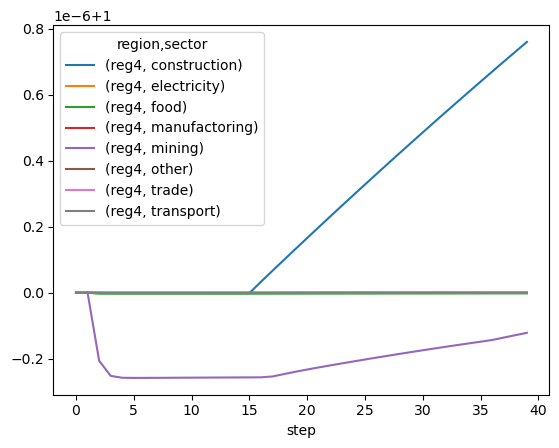

In [9]:
# You can generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

df.loc[:, ("reg4", slice(None))].plot()

The IOSystem given to instantiate a model requires to contain intermediate demand matrix Z, final demand matrix Y and gross production vector x as attributes, and to be balanced.

In [10]:
# import pymrio

# model = ARIOPsiModel(
#     pym_mriot=mriot,
#     order_type="alt",
#     alpha_base=1.0,
#     alpha_max=1.25,
#     alpha_tau=365,
#     rebuild_tau=60,
#     main_inv_dur=90,
#     monetary_factor=10**6,
#     temporal_units_by_step=1,
#     iotable_year_to_temporal_unit_factor=365,
#     infinite_inventories_sect=None,
#     inventory_dict=None,
#     productive_capital_vector=None,
#     productive_capital_to_VA_dict=None,
#     psi_param = 0.80,
#     inventory_restoration_tau = 60,
# )

Loading in data from pymrio to initiate model

In [ ]:
import pymrio
eora_storage = "data/tmp/eora26"

# eora26 must be manually downloaded from https://www.eora.info/

# eora_log = pymrio.download_eora26(
#     storage_folder=eora_storage,
#     email="",
#     password="",
#     years=[2009],
#     ) # downloads all
# print(eora_log)

In [15]:
import pymrio
print(pymrio.__version__)

eora = pymrio.parse_eora26(year=2009, path=eora_storage)
print(type(eora))  # Should be <class 'pymrio.core.mriosystem.IOSystem'>

0.5.4


/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)


<class 'pymrio.core.mriosystem.IOSystem'>


/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=Tr

/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/core/mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_pba.groupby(lev

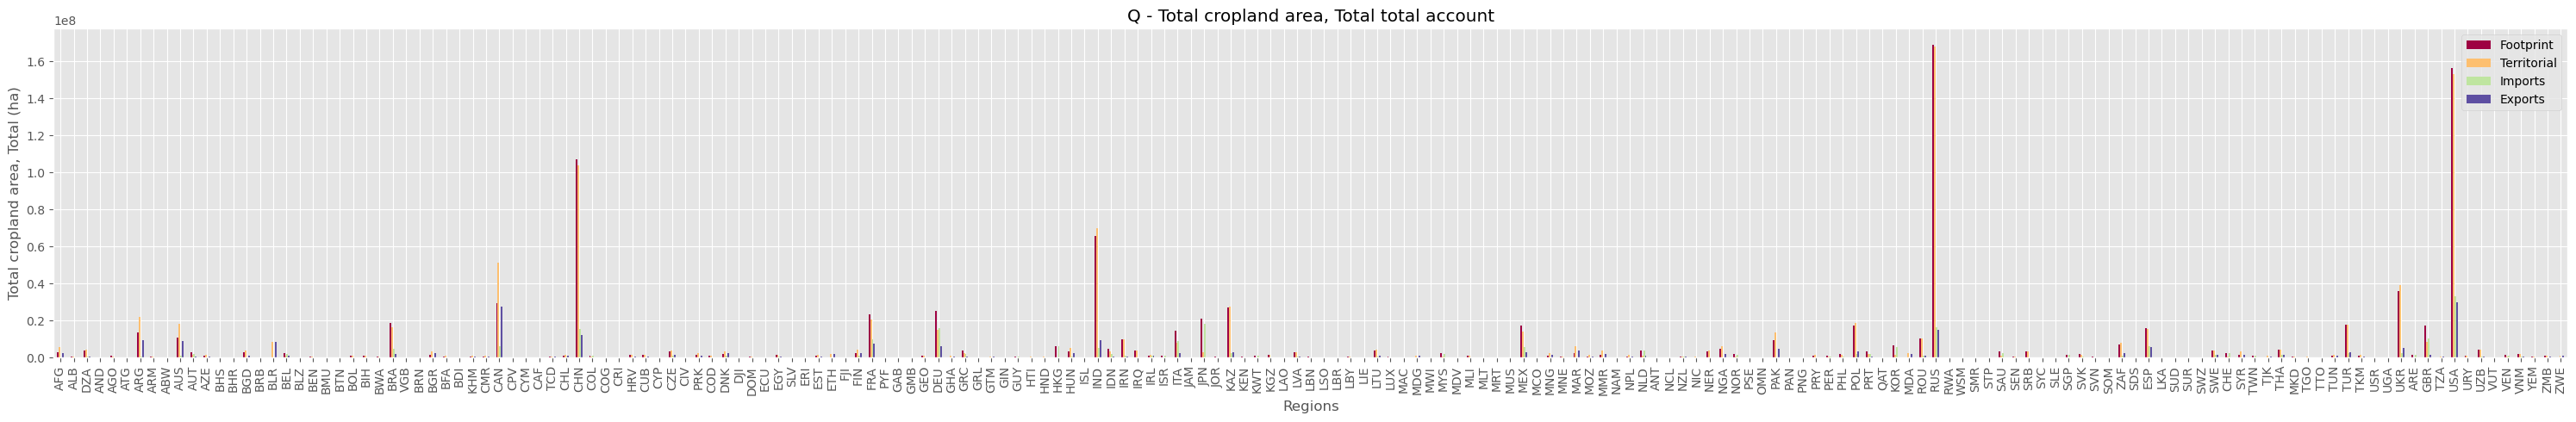

In [17]:
eora.calc_all()

import matplotlib.pyplot as plt

with plt.style.context("ggplot"):
    eora.Q.plot_account(("Total cropland area", "Total"), figsize=(30, 5))
    plt.show()

## Testing with EORA data and example event/impact
These cells parse the eora dataset using pymrio, and set up the ARIOsiModel with test parameters, simulating a shock to Russian Agriculture (because eora does not disaggregate more). 

First, we can inspect the eora. class which contains the basic information in the eora set up. 

In [18]:
import pandas as pd

eora.get_extensions()
list(eora.get_extensions())

sectors = eora.get_sectors()
final_demand = eora.get_Y_categories()

# Get sectors and create a DataFrame
sectors = eora.get_sectors()
sectors_df = pd.DataFrame(sectors)

# Get regions and create a DataFrame
regions = eora.get_regions()
regions_df = pd.DataFrame(regions)

# Get final demand categories and create a DataFrame
final_demand = eora.get_Y_categories()
final_demand_df = pd.DataFrame(final_demand)

# If you want to see the extensions (environmental/social indicators)
extensions = eora.get_extensions()
extensions_df = pd.DataFrame(list(extensions))

# View the first few rows of each DataFrame
print("Sectors:")
print(sectors_df.head())
print("\nRegions:")
print(regions_df.head())
print("\nFinal Demand Categories:")
print(final_demand_df.head())
print("\nSatellites:")
print(extensions_df.head())

Sectors:
                         sector
0                   Agriculture
1                       Fishing
2          Mining and Quarrying
3              Food & Beverages
4  Textiles and Wearing Apparel

Regions:
  region
0    AFG
1    ALB
2    DZA
3    AND
4    AGO

Final Demand Categories:
                                          category
0                 Household final consumption P.3h
1  Non-profit institutions serving households P.3n
2                Government final consumption P.3g
3               Gross fixed capital formation P.51
4                      Changes in inventories P.52

Satellites:
    0
0   Q
1  VA


Saving txt files as pkl for calculations. The pickled files should be in the format required via parsing from pymrio. TBD on this. 

In [20]:
import pymrio
import os

# First check valid eora object
eora = pymrio.parse_eora26(year=2009, path=eora_storage)

# Create the directory
eora_pkl = "data/tmp/eora/Eora26_2009_pkl/"
os.makedirs(eora_pkl, exist_ok=True)

## Pickle
# Save to pickle format
eora.save_all(path=eora_pkl, table_format="pkl")

# Load the pickled data
eora = pymrio.load_all(path=eora_pkl)


/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/pymrio/tools/ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=Tr

Inspecting the Russian agricultural sector total output value. 

In [23]:
# Steps to inspect total production (output) of the Russian agricultural sector
# 1. Specify the time step = 0 = before the disaster? 
model.calc_production(0)

# 2. Access the production array (usually model.production or model.production_realised)
# model.production is a numpy array with shape (n_regions * n_sectors,)
# model.mriot provides the MultiIndex for (region, sector)

# 2.1 Get the MultiIndex for (region, sector)
index = model.mriot.x.index  # This is usually a MultiIndex (region, sector)

# 2.2 Convert production to a pandas Series for easy indexing
import pandas as pd
prod_series = pd.Series(model.production, index=index)

# 3. Extract the value for ('RUS', 'Agriculture')
rus_agri_output = prod_series.loc[('RUS', 'Agriculture')]
print("Total output for Russian Agriculture sector:", rus_agri_output)

# Test other sectors output
rus_fmq_output = prod_series.loc[('RUS', 'Mining and Quarrying')]
print("Total output for Russian Mining and Quarrying sector:", rus_fmq_output)


NameError: name 'model' is not defined

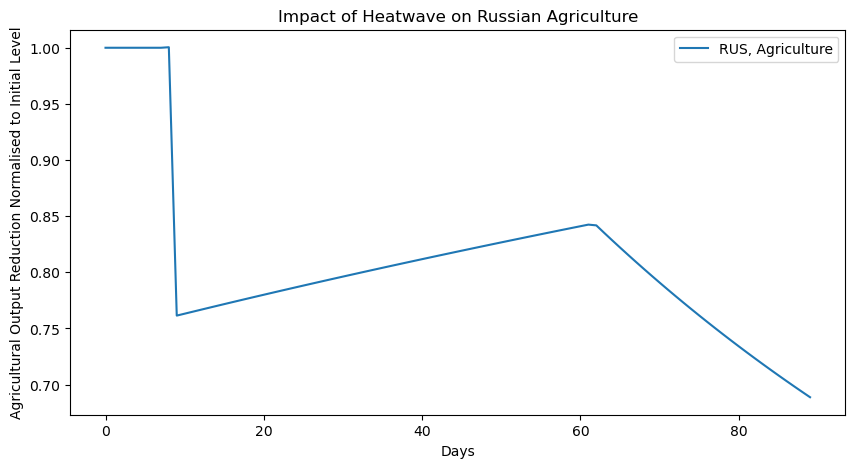

In [ ]:
import matplotlib.pyplot as plt

# You can generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

russia = df.loc[:, ("RUS", slice('Agriculture'))]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(russia)

ax.set_xlabel("Days")
ax.set_ylabel("Agricultural Output Reduction Normalised to Initial Level")
ax.set_title("Impact of Heatwave on Russian Agriculture")

ax.legend(lines, ['RUS, Agriculture'])

plt.show()

Trying to calibrate the io model to take custom information, like the eora mriot and a new damage sector etc. Here we consider a 500,000 impact to Russian Agriculture, assuming that the rebuilding sectors are major inputs to agriculture including fertilisers, which are part of an aggregated category. 

In [24]:
import pymrio
import warnings

# Suppress the FutureWarning if you want
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Load the Eora data
eora = pymrio.load_all(path=eora_pkl)

# 2. Calculate all required tables
eora = eora.calc_all()

# 3. Now create the model
from boario.extended_models import ARIOPsiModel  # The core of the model

model = ARIOPsiModel(
    pym_mrio=eora,
    order_type="alt",
    alpha_base=1.0,
    alpha_max=1.25,
    alpha_tau=365,
    rebuild_tau=60,
    main_inv_dur=90,
    monetary_factor=10**6,
    temporal_units_by_step=1,
    iotable_year_to_temporal_unit_factor=365
)

import pandas as pd
impact = pd.Series(
    data=[100000000],
    index=pd.MultiIndex.from_product(
        [["RUS"], ["Agriculture"]], names=["region", "sector"]
    ),
)

from boario import event

ev = event.from_series(
    impact=impact,
    event_type="rebuild",
    rebuild_tau=60,
    rebuilding_sectors={"Agriculture": 0.8, "Petroleum, Chemical and Non-Metallic Mineral Products": 0.2},
    rebuilding_factor=0.9,
    occurrence=1,
    duration=7,
    name="Heatwave",
)

from boario.simulation import Simulation

# Create a new simulation with your Eora model
sim = Simulation(
    model=model,  # This is your ARIOPsiModel with Eora data
    n_temporal_units_to_sim=365,  # simulation length
    register_stocks=True,  # track stocks
    show_progress=True,  # show progress during simulation
    save_events=True, 
    save_params=True, 
    save_index=True, 
    save_records=[], 
    boario_output_dir='/Users/cmor7802/repos/climpyplots/boario/results/boario-eora-09', 
    results_dir_name=None, 
)

# Now try adding the event
sim.add_event(ev)

# Launch the simulation
sim.loop()

/opt/anaconda3/envs/scmods/lib/python3.12/site-packages/boario/model_base.py:252: UserWarning: Found negative values in the value added, will set to 0. Note that industries with null value added will have a null productive capital if it is defined from value added.
                industries with negative VA: MultiIndex([('ABW',              'Agriculture'),
            ('ABW',                  'Fishing'),
            ('ABW',           'Metal Products'),
            ('ABW',                   'Others'),
            ('ABW',      'Transport Equipment'),
            ('ALB',                'Recycling'),
            ('ANT', 'Electrical and Machinery'),
            ('ANT',      'Other Manufacturing'),
            ('ANT',    'Re-export & Re-import'),
            ('ANT',                'Recycling'),
            ...
            ('SWE',             'Retail Trade'),
            ('SWZ',                'Recycling'),
            ('TJK',    'Re-export & Re-import'),
            ('TZA',    'Re-export & 

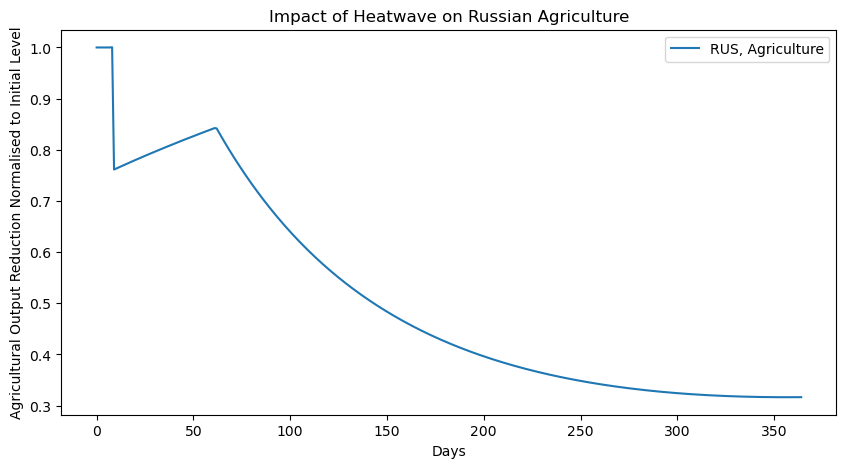

In [25]:
import matplotlib.pyplot as plt

# You can generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

russia = df.loc[:, ("RUS", slice('Agriculture'))]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(russia)

ax.set_xlabel("Days")
ax.set_ylabel("Agricultural Output Reduction Normalised to Initial Level")
ax.set_title("Impact of Heatwave on Russian Agriculture")

ax.legend(lines, ['RUS, Agriculture'])

plt.show()

Pre-processing IO data
Requires: 
1) Calculating total output
2) Calculating total input
3) Checking balancing
4) Rebalancing

Then: 
1) Checking final demand for negatives
2) Mirroring to remove negatives
3) Rebalancing
4) Offsetting with very small 0

In [ ]:
# x = Z + Y
# where A = T xhat^-1
import pandas as pd
import numpy as np

# Load the pickled Z and Y matrices
Z = pd.read_pickle('/Users/cmor7802/repos/climpyplots/boario/data/tmp/eora/Eora26_2009_pkl/Z.pkl')
Y = pd.read_pickle('/Users/cmor7802/repos/climpyplots/boario/data/tmp/eora/Eora26_2009_pkl/Y.pkl')
VA = pd.read_pickle('/Users/cmor7802/repos/climpyplots/boario/data/tmp/eora/Eora26_2009_pkl/VA/F.pkl')

# Get the sum of first row for Z
z_row_sum = Z.iloc[0, :].sum()
z_col_sum = Z.iloc[:, 0].sum()

# Get the sum of first row for Y
y_row_sum = Y.iloc[0, :].sum()

# Total output for first row (x = Z + f)
total_output_row1 = z_row_sum + y_row_sum

va_col_sum = VA.iloc[:, 0].sum()

total_input_col1 = va_col_sum + z_col_sum

print(f"Sum of first row in Z: {z_row_sum}")
print(f"Sum of first row in Y: {y_row_sum}")
print(f"Total output (x) for first row: {total_output_row1}")
print(f"Sum of first column in VA: {va_col_sum}")
print(f"Sum of first column in Z: {z_col_sum}")
print(f"Total input (x) for first column: {total_input_col1}")

diff = total_input_col1 - total_output_row1

print(f"Difference between total input and total output: {diff}")

# Find the number of negatives in the Y matrix
negatives_in_Y = (Y < 0).sum().sum()
print(f"Number of negative values in Y: {negatives_in_Y}")

# Find the number of negatives in the Z matrix
negatives_in_Z = (Z < 0).sum().sum()
print(f"Number of negative values in Z: {negatives_in_Z}")


Sum of first row in Z: 399460.126665488
Sum of first row in Y: 205862.86657
Total output (x) for first row: 605322.993235488
Sum of first column in VA: 346257.76999999996
Sum of first column in Z: 248426.25700910893
Total input (x) for first column: 594684.0270091089
Difference between total input and total output: -10638.966226379038
Number of negative values in Y: 673
Number of negative values in Z: 0
